In [1]:
import numpy as np

from robust_smc.data import LinearTANSimulator
from robust_smc.sampler import LinearDiagonalGaussianBPF

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
simulator = LinearTANSimulator(100, observation_std=20.0, seed=82)

In [3]:
num_samples = 1000
prior_std = np.array([1e-1, 1e-1, 0.5, 0.02, 0.02, 0.1])
# prior_std = simulator.process_std
transition_matrix = simulator.transition_matrix
# x_init = np.zeros((num_samples, 6))
x_init = np.repeat(simulator.X0[None, :], num_samples, axis=0)
noise_std = 20.0

In [4]:
sampler = LinearDiagonalGaussianBPF(simulator.Y, transition_matrix=transition_matrix, 
                                    noise_std=noise_std, prior_std=prior_std, 
                                    x_init=x_init, observation_model=simulator.observation_model,
                                    num_samples=num_samples
                                   )

In [5]:
sampler.sample()

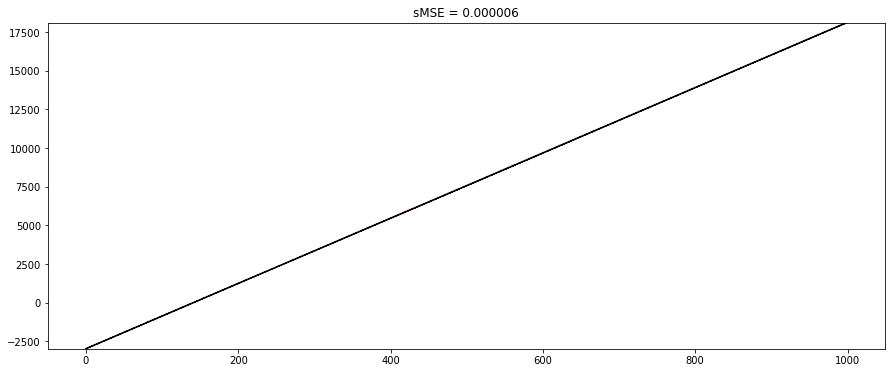

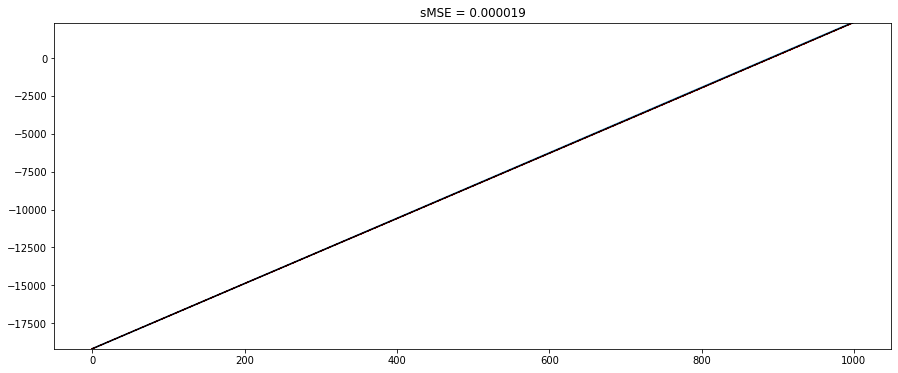

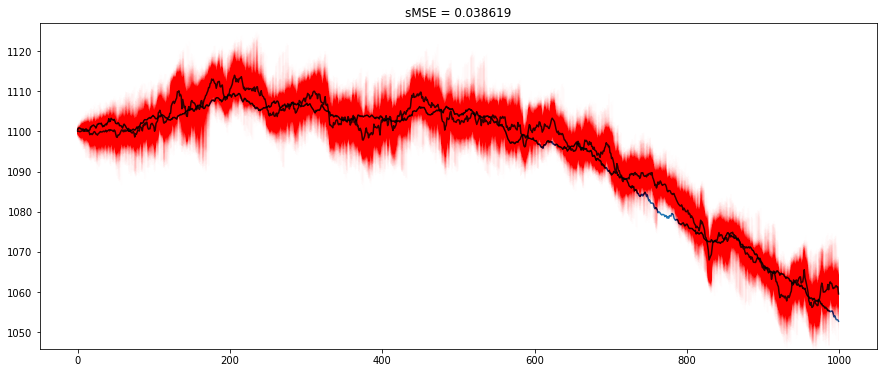

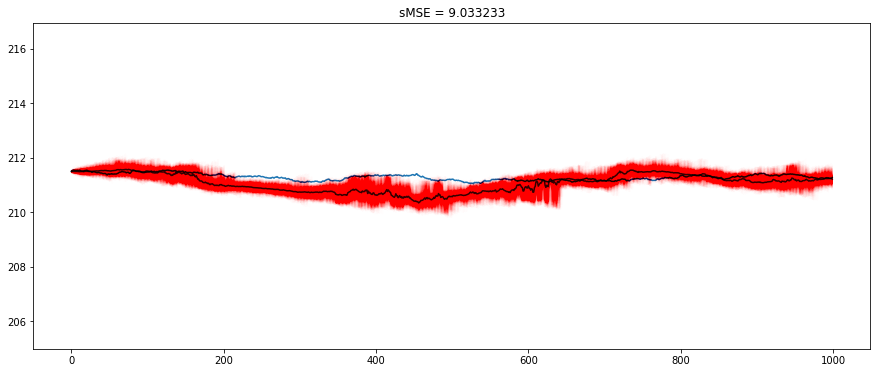

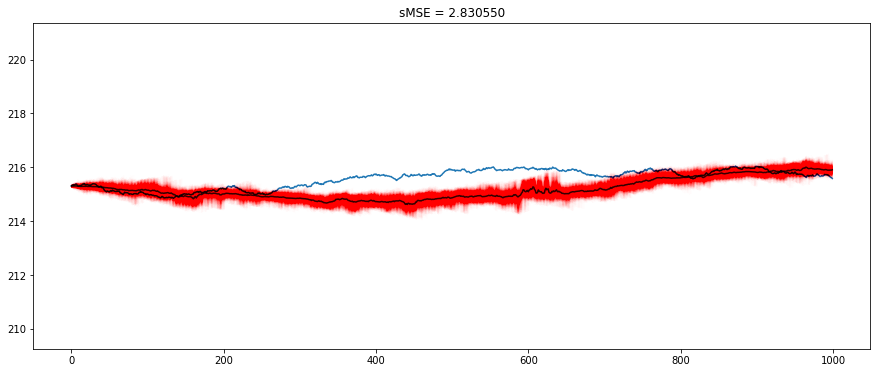

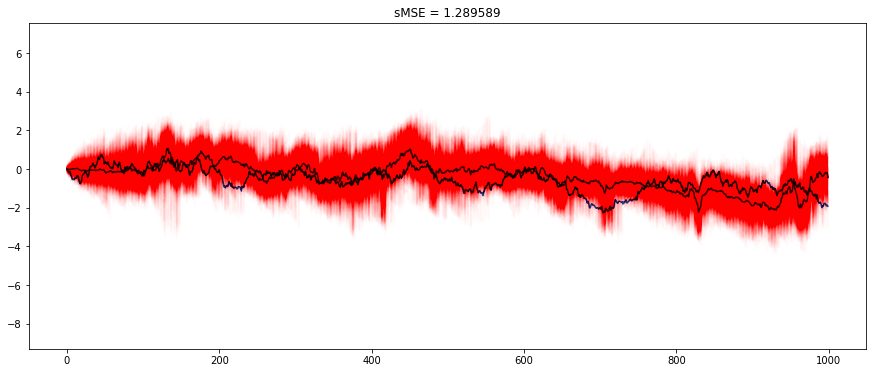

In [6]:
for var in range(6):
    plt.figure(figsize=(15, 6))
    traj = np.stack(sampler.x_trajectories)
    plt.plot(simulator.X[1:, var])
    mean = traj[:, :, var].mean(axis=1)
    plt.plot(mean, c='k', alpha=0.8, ls='-')
    smse = mean_squared_error(simulator.X[1:, var], mean) / np.var(simulator.X[1:, var])
    for i in range(num_samples):
        plt.plot(traj[:, i, var], c='r', alpha=0.005, ls='-')
        lims = (np.min(traj[:, i, var]), np.max(traj[:, i, var]))
        plt.ylim(lims[0] - 5., lims[1] + 5.0)
        plt.title('sMSE = {:4f}'.format(smse))
    plt.savefig(f'./figures/linear-bpf-trajectories_{var}.png', dp=300)

In [7]:
ess = [sampler.effective_sample_size(logw) for logw in sampler.logw]

plt.figure(figsize=(16, 6))
plt.bar(range(len(ess)), ess, width=0.4)
plt.title('Effective sample size with time')
plt.ylim((600, 1000));